By analysing the true and predicted labels as a graph, we can see which genres are mismatched the most.

For the network analysis, I'll use the NetworkX.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt


In [2]:
# Import the data (table with mine and Mojca's annotations)
sl_df = pd.read_json("results-RoBERTa/main-classification-results-roberta-3runs.json")

sl_df

,trained_on,tested_on,microF1,macroF1,y_true,y_pred
0,SL-GINCO,SL-GINCO,0.802469,0.734463,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Promotion, ..."
1,SL-GINCO,CORE,0.631191,0.536556,"[News, News, News, News, Information/Explanati...","[News, Promotion, News, News, Opinion/Argument..."
2,MT-GINCO,MT-GINCO,0.814815,0.869582,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Instruction..."
3,MT-GINCO,CORE,0.634434,0.536819,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Opinion/Argumentation..."
4,CORE,CORE,0.768573,0.719598,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Information/Explanati..."
5,CORE,SL-GINCO,0.580247,0.611434,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Information/Explanation, New..."
6,CORE,MT-GINCO,0.629630,0.668220,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Information/Explanation, New..."
7,SL-GINCO,SL-GINCO,0.783951,0.730276,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Promotion, ..."
8,SL-GINCO,CORE,0.651386,0.556129,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Information/Explanati..."
9,MT-GINCO,MT-GINCO,0.814815,0.848900,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Instruction..."


In [6]:
# Add column trained-on+tested-on
sl_df["experiment"] = sl_df["trained_on"] + "+" + sl_df["tested_on"]

sl_df

,trained_on,tested_on,microF1,macroF1,y_true,y_pred,experiment
0,SL-GINCO,SL-GINCO,0.802469,0.734463,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Promotion, ...",SL-GINCO+SL-GINCO
1,SL-GINCO,CORE,0.631191,0.536556,"[News, News, News, News, Information/Explanati...","[News, Promotion, News, News, Opinion/Argument...",SL-GINCO+CORE
2,MT-GINCO,MT-GINCO,0.814815,0.869582,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Instruction...",MT-GINCO+MT-GINCO
3,MT-GINCO,CORE,0.634434,0.536819,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Opinion/Argumentation...",MT-GINCO+CORE
4,CORE,CORE,0.768573,0.719598,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Information/Explanati...",CORE+CORE
5,CORE,SL-GINCO,0.580247,0.611434,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Information/Explanation, New...",CORE+SL-GINCO
6,CORE,MT-GINCO,0.629630,0.668220,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Information/Explanation, New...",CORE+MT-GINCO
7,SL-GINCO,SL-GINCO,0.783951,0.730276,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Promotion, ...",SL-GINCO+SL-GINCO
8,SL-GINCO,CORE,0.651386,0.556129,"[News, News, News, News, Information/Explanati...","[News, News, News, News, Information/Explanati...",SL-GINCO+CORE
9,MT-GINCO,MT-GINCO,0.814815,0.848900,"[Promotion, News, Promotion, News, Instruction...","[Promotion, News, Promotion, News, Instruction...",MT-GINCO+MT-GINCO


In [22]:
def experiment_df(experiment):
	"""
	This function creates a dataframe from the results table which can be used for the grsph visualisation.

	Args:
	- experiment (string): experiment case, as written in the column "experiment"

	Returns the dataframe which should be passed to the label_graph function.
	"""
	sl_ginco_df = sl_df[sl_df["experiment"] == experiment]

	# Create y_true and y_pred list of all labels from all runs
	y_true_list = []

	for i in sl_ginco_df["y_true"]:
		for element in i:
			y_true_list.append(element)
	y_pred_list = []

	for i in sl_ginco_df["y_pred"]:
		for element in i:
			y_pred_list.append(element)

	# Create a DataFrame with the two labels

	sl_ginco_graph = pd.DataFrame({"Source":y_true_list, "Target": y_pred_list})

	return sl_ginco_graph

In [25]:
sl_ginco_core_df

,Source,Target,agreement
0,News,News,nan
1,News,Promotion,no
2,News,News,nan
3,News,News,nan
4,Information/Explanation,Opinion/Argumentation,no
...,...,...,...
20347,Opinion/Argumentation,Opinion/Argumentation,nan
20348,Opinion/Argumentation,Information/Explanation,no
20349,Information/Explanation,Opinion/Argumentation,no
20350,Opinion/Argumentation,Instruction,no


In [30]:
sl_ginco_core_df['weight'] = sl_ginco_core_df.groupby(['Source', 'Target'])['Source'].transform('size')
sl_ginco_core_df.head(2)

,Source,Target,agreement,weight
0,News,News,nan,5561
1,News,Promotion,no,145


In [31]:
# Normalize the weight
sl_ginco_core_df['weight'] = (sl_ginco_core_df['weight'] - sl_ginco_core_df['weight'].min()) / (sl_ginco_core_df['weight'].max() - sl_ginco_core_df['weight'].min())    
  
sl_ginco_core_df.head(2)

,Source,Target,agreement,weight
0,News,News,nan,1.000000
1,News,Promotion,no,0.025899


In [59]:
def label_graph(sl_df):
	"""
	Args:
	- sl_df (DataFrame): DataFrame with nodes in columns "Source" and "Target"
	"""
	# Find columns where the nodes are connected to themselves
	sl_df['agreement'] = np.where((sl_df['Source'] == sl_df['Target']), np.nan, "no")

	# Discard columns with agreement
	sl_df = sl_df[sl_df["agreement"] == "no"]

	# Calculate the edge weight (number of occurences of the same pair)
	sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')

	# Normalize the weight and make it a bit larger
	sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10   
  

	# Load df as a networkx graph
	sl_G = nx.from_pandas_edgelist(sl_df, source="Source", target="Target", edge_attr="weight", create_using=nx.DiGraph())

	widths = nx.get_edge_attributes(sl_G, 'weight')
	nodelist =sl_G.nodes()

	d = dict(sl_G.degree)

	plt.figure(figsize=(15,15))

	# Choose the layout
	pos = nx.shell_layout(sl_G)
	nx.draw_networkx_nodes(sl_G,pos,
						nodelist=nodelist,
						#node_size =1000,
						node_color = "lightblue",
						node_size=[v * 100 for v in d.values()]
						)
	nx.draw_networkx_edges(sl_G,pos,
						edgelist = widths.keys(),
						width=list(widths.values()),
						edge_color="blue", 
						alpha=0.6,
						arrows = True,
						#arrowstyle="->",
    					arrowsize=30,
						)
	nx.draw_networkx_labels(sl_G, pos=pos,
							labels=dict(zip(nodelist,nodelist)),
							font_size = 12,
							)
	plt.box(False)
	plt.show()
		

C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/617650510.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/617650510.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


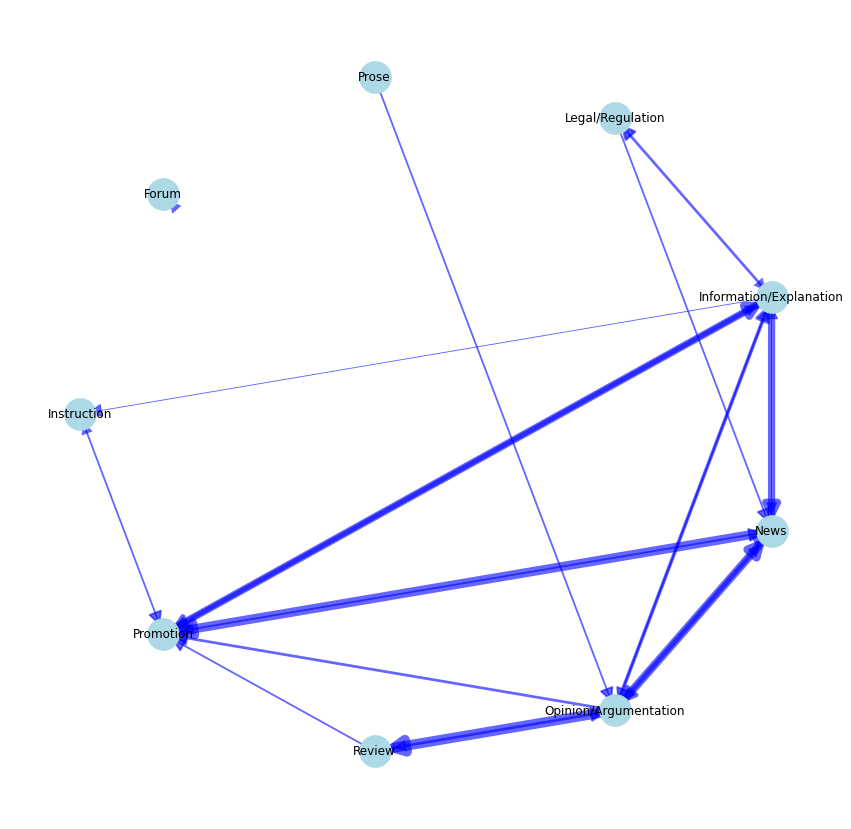

In [55]:
label_graph(sl_ginco_graph)

In [23]:
# Let's analyze other experiments
sl_df.experiment.unique()

array(['SL-GINCO+SL-GINCO', 'SL-GINCO+CORE', 'MT-GINCO+MT-GINCO',
       'MT-GINCO+CORE', 'CORE+CORE', 'CORE+SL-GINCO', 'CORE+MT-GINCO'],
      dtype=object)

C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/2317609490.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/2317609490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


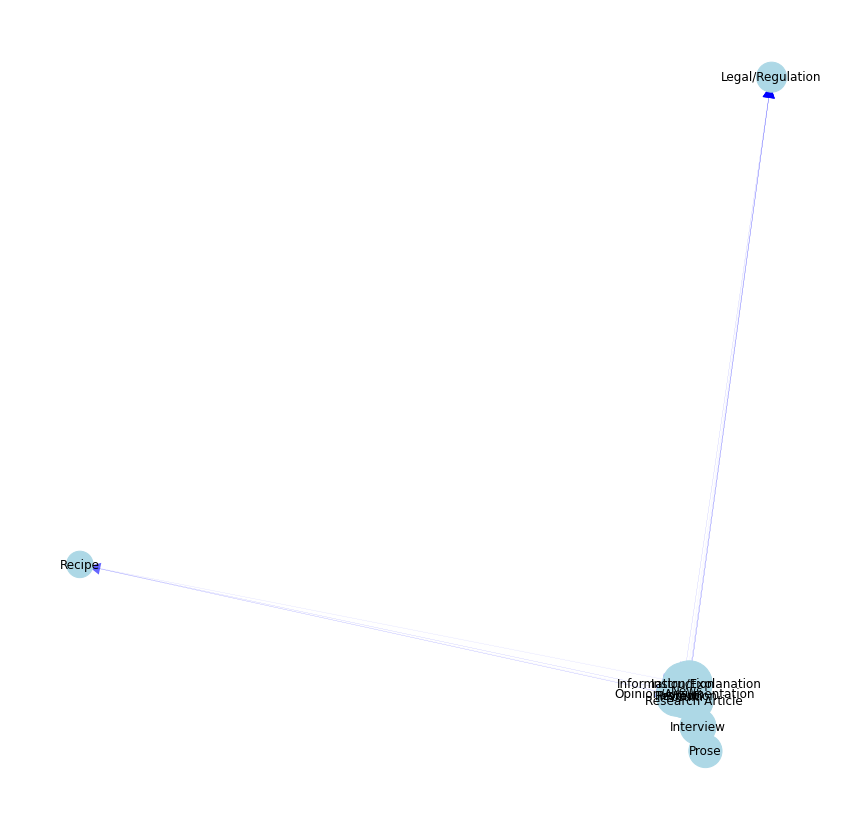

In [60]:
sl_ginco_core_df = experiment_df("SL-GINCO+CORE")

label_graph(sl_ginco_core_df)

C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/4241057321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/4241057321.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


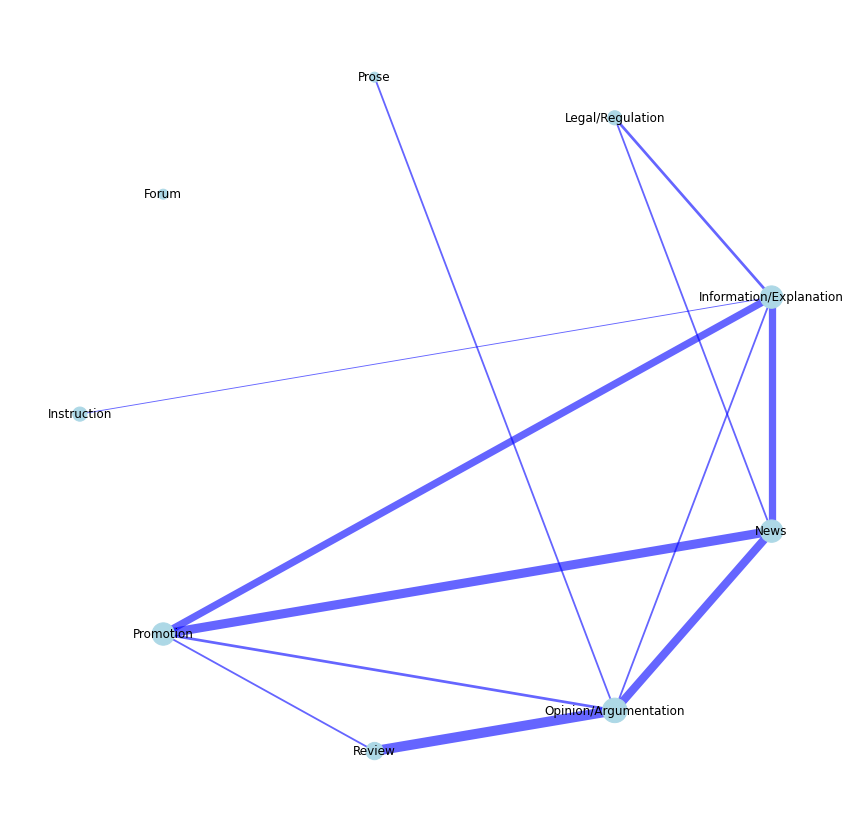

In [36]:
sl_ginco_df = experiment_df("SL-GINCO+SL-GINCO")

label_graph(sl_ginco_df)

C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/992752356.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/992752356.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


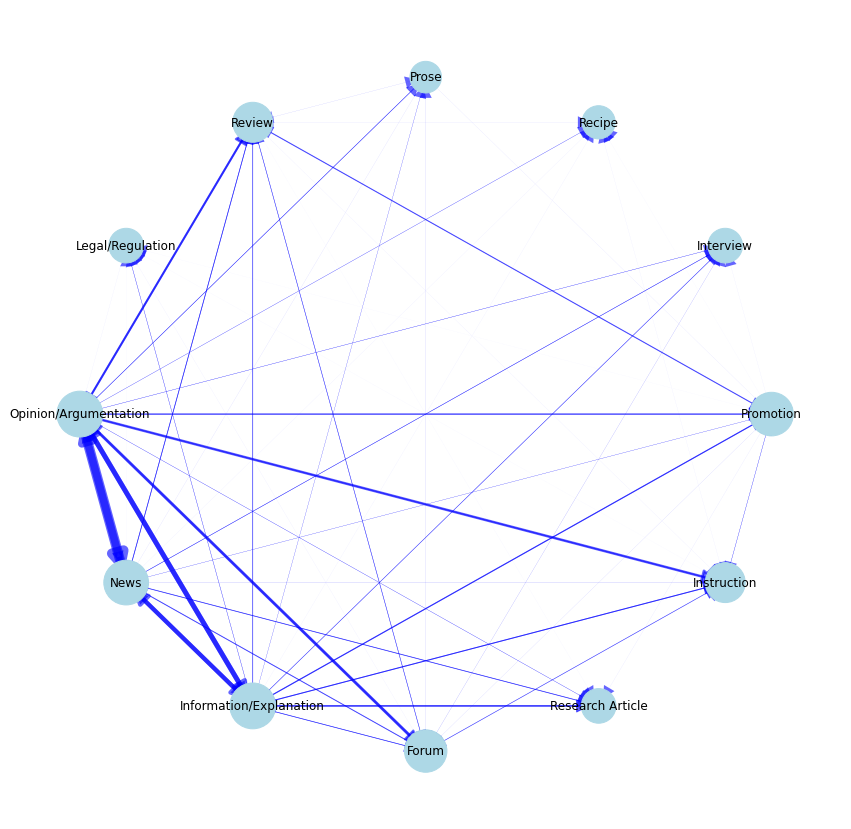

In [58]:
core_df = experiment_df("CORE+CORE")

label_graph(core_df)

C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/4241057321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = sl_df.groupby(['Source', 'Target'])['Source'].transform('size')
C:\Users\tajak\AppData\Local\Temp/ipykernel_14700/4241057321.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_df['weight'] = (sl_df['weight'] - sl_df['weight'].min()) / (sl_df['weight'].max() - sl_df['weight'].min()) *10


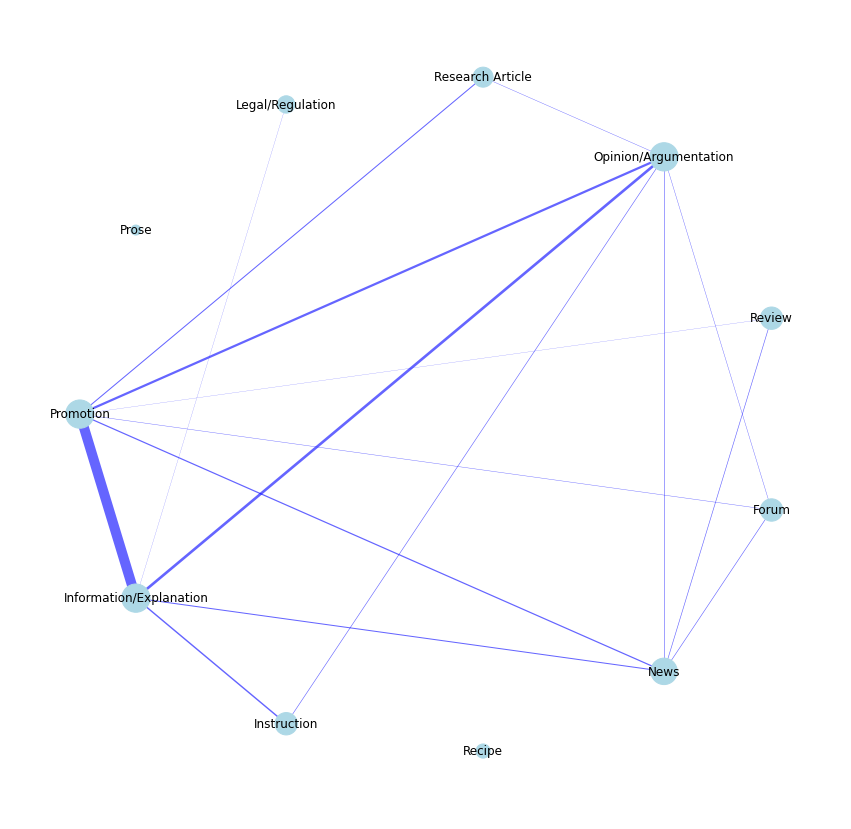

In [38]:
core_mt_ginco_df = experiment_df("CORE+MT-GINCO")

label_graph(core_mt_ginco_df)